In [1]:
import model as my_model
import dataloader as my_dataset
import train as my_train
from res_AE import ResNetAE  # res_ae = ResNetAE()

import random

from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import random_split
import torch.nn as nn
from glob import glob

In [2]:
#plt.style.use('ggplot')
plt.style.use('classic')

In [3]:
good_bad_dataset = my_dataset.QR_good_bad_dataset("./data", image_size=256, image_channels=1)

# split dataset
my_dataloader, my_val_dataset, my_test_dataset = random_split(good_bad_dataset, [0.7, 0.2, 0.1],
                                                              generator=torch.Generator().manual_seed(42))
#my_dataloader, my_val_dataset, _ = random_split(good_bad_dataset, [7, 3, 720])  # for fast test

my_dataloader = DataLoader(good_bad_dataset, batch_size=8, drop_last=True, pin_memory=False)
my_val_dataloader = DataLoader(my_val_dataset, batch_size=4, drop_last=True, pin_memory=False)
r, c = 2, 3
assert r * c <= len(my_test_dataset)
test_dataloader = DataLoader(my_test_dataset, batch_size=r*c, drop_last=False, pin_memory=False)

# net = my_model.Autoencoder()
# net.load_state_dict(torch.load("./11-28-07-26-2000.pt"))

net = ResNetAE(input_shape=(256,256,1))
net.load_state_dict(torch.load("best.pt"))
net.cuda()
print()

In [4]:
torch.manual_seed(0)

In [ ]:
#
net = my_train.train(net, my_dataloader, my_val_dataloader, epoches=20000, lr=1e-5)

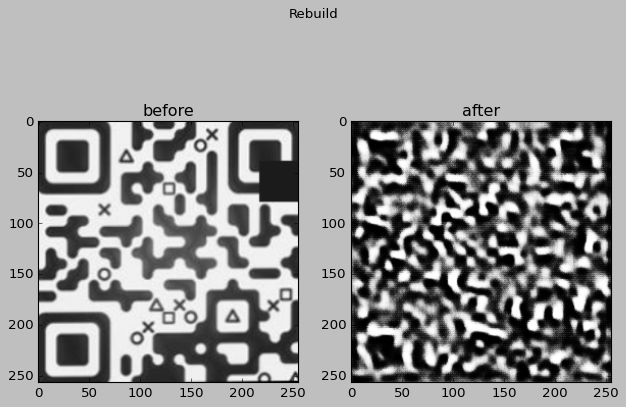

In [5]:
# bad image
test_batch = my_val_dataset[random.randint(0, len(my_val_dataset))][1].reshape(1, 1, 256, 256)
# show bad batch
_test_batch_show = np.array(test_batch.reshape(256, 256, 1))
plt.imshow(_test_batch_show, cmap=plt.cm.gray)
fig1 = plt.gcf()
fig1.savefig("before.png")

output_batch = net(test_batch.cuda().float()/255.)
# show output_batch batch
_output_show = output_batch.reshape(256, 256, 1).detach().cpu().numpy()
plt.imshow(_output_show, cmap=plt.cm.gray)
fig2 = plt.gcf()
fig2.savefig("after.png")

plt.close()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Rebuild')
#
ax1.set_title('before')
ax1.imshow(_test_batch_show, cmap=plt.cm.gray)
#
ax2.set_title('after')
ax2.imshow(_output_show, cmap=plt.cm.gray)
plt.tight_layout()
plt.show()

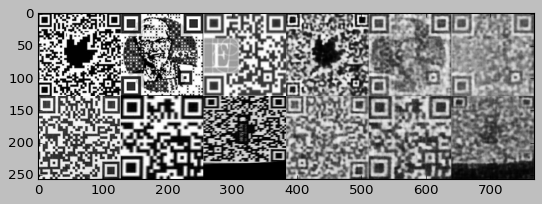

In [6]:
plt.imshow(my_train.make_test_view(net, test_dataloader,r,c, sub_size=128)*255.0, cmap='gray')
plt.savefig("preview.jpg", dpi=300)


In [ ]:
from datetime import datetime
from datetime import timedelta
import pytz


datetime.now() + timedelta(hours=8)


In [ ]:
# for validation dataloader
# mse = nn.MSELoss()

# for pt in glob("weights/*"):
#     net = ResNetAE(input_shape=(256,256,1))
#     net.load_state_dict(torch.load(pt))
#     #net.cuda()
#     net.eval()
#     loss_tmp = 0
#     for batch_idx, data_good_bad in enumerate(my_val_dataloader):
#         good, bad = data_good_bad
#         good = good.float()
#         bad = bad.float()
#         loss = mse(net(bad), good)
        
#         loss_tmp += loss
#     loss_tmp /= batch_idx
#     print(f"{pt}: ", loss_tmp)
#     break
    
    